In [1]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
from functions import *
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
os.listdir(sys.path[0]+'/../../NMRDataFits')

['Christin.npy',
 'Chicago.npy',
 'Donya.npy',
 'HunterKin2.npy',
 'Windmill.npy',
 'indicesInRange.npy',
 'Fringe.npy',
 'HunterKin3.npy',
 'FitsInRange.npy',
 'FitsInRange.txt',
 'datesInRange.npy',
 'FitsInRangeErrors.npy',
 'Fringe.txt',
 'Chicago.txt']

# Here, I bring in fits generated in the "LoadNMR" notebook

In [3]:
hunterFitsK2=np.load(sys.path[0]+'/../../NMRDataFits/Donya.npy')

nmrDateStrings=hunterFitsK2[0].astype(int).astype(str)

nmrDates=np.empty(0)
for i in nmrDateStrings:
    nmrDates=np.append(nmrDates,datetime.strptime(i,"%Y%m%d%H%M%S"))

pcFits=hunterFitsK2[1]
usFits=hunterFitsK2[2]
dsFits=hunterFitsK2[3]

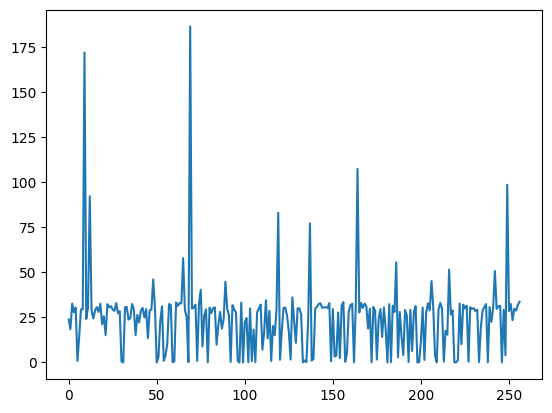

In [4]:
plt.plot(dsFits)

# Here, I bring in EPR calibrations generated in the "LoadEPR" notebook

In [5]:
EPR=np.load(sys.path[0]+'/../../EPRArray/DonyaCals.npy',allow_pickle=True)
EPRdates=EPR[0]
EPRpc=EPR[1]
EPRds=EPR[3]

eprDateStrings=EPR[0].astype(int).astype(str)

eprDates=np.empty(0)
for i in eprDateStrings:
    eprDates=np.append(eprDates,datetime.strptime("20230"+i,"%Y%m%d%H%M"))

pcCals=EPR[1]
usCals=EPR[2]
dsCals=EPR[3]

In [6]:
EPRdates

array([9221110., 9290411., 9290449.])

In [7]:
EPRds

array([1.2802, 1.3499, 1.2495])

# Organizing NMRs 

(array([19613., 19617., 19621., 19625., 19629., 19631., 19635., 19639.]),
 [Text(19613.0, 0, '2023-09-13'),
  Text(19617.0, 0, '2023-09-17'),
  Text(19621.0, 0, '2023-09-21'),
  Text(19625.0, 0, '2023-09-25'),
  Text(19629.0, 0, '2023-09-29'),
  Text(19631.0, 0, '2023-10-01'),
  Text(19635.0, 0, '2023-10-05'),
  Text(19639.0, 0, '2023-10-09')])

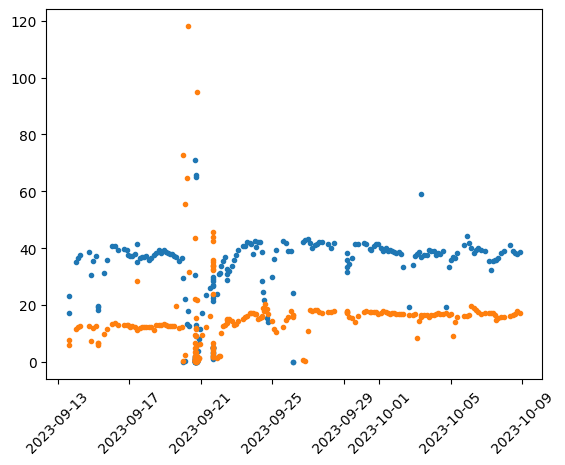

In [8]:
Hdate2=hunterFitsK2[0].astype(int).astype(str)

Hdate2_objects=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in Hdate2]
Hdate2_array=np.array(Hdate2_objects)
Hsorted_dates2=np.sort(Hdate2_array)
Hindex_array2=[Hdate2_objects.index(date) for date in Hsorted_dates2]

len(Hsorted_dates2)
H2=hunterFitsK2[3][Hindex_array2]
H2pc=hunterFitsK2[1][Hindex_array2]
checkerH2=np.where(H2pc<120)
Hsorted_dates2=Hsorted_dates2[checkerH2]
H2=H2[checkerH2]
H2pc=H2pc[checkerH2]


Hsorted_dates2=Hsorted_dates2[np.where(H2!=0)]
H2=H2[np.where(H2!=0)]
H2pc=H2pc[np.where(H2!=0)]

H2pc1=H2pc[:45]/4.076
H2pc2=H2pc[45:]
H2pc=np.append(H2pc1,H2pc2)
#Hsorted_dates2=Hsorted_dates2[np.where(H2<33)]
#H2pc=H2pc[np.where(H2<33)]
#H2=H2[np.where(H2<33)]


plt.plot(Hsorted_dates2,1.278*H2,'.',label='Before Correction')
plt.plot(Hsorted_dates2,H2pc,'.',label='PC')
#plt.plot(Hsorted_dates2,H2pc)
#plt.ylim((40,70))
#plt.plot(Hsorted_dates2[:-10],CorrectedNMRs[:-10],'.', label="After Correction")
#plt.legend(loc='upper left')
plt.xticks(rotation=45)

In [9]:
Hsorted_dates2[45]

datetime.datetime(2023, 9, 20, 0, 43, 17)

In [10]:
np.where(H2pc==0)

(array([], dtype=int64),)

In [11]:
len(H2)

241

In [12]:
sweepRatios=H2pc/H2

In [13]:
sweepRatios

array([4.23450129e-01, 4.42030704e-01, 4.17833870e-01, 4.23826240e-01,
       4.25443010e-01, 4.24709113e-01, 3.08727581e-01, 4.25967227e-01,
       4.26844323e-01, 4.70696102e-01, 4.35513015e-01, 3.85446351e-01,
       3.98129602e-01, 4.11070831e-01, 4.23896231e-01, 4.26213795e-01,
       4.21707997e-01, 4.12949658e-01, 4.25830803e-01, 4.41698181e-01,
       4.23044550e-01, 4.26299260e-01, 4.18734785e-01, 8.75189019e-01,
       4.15364549e-01, 4.22721418e-01, 4.21798784e-01, 4.25502755e-01,
       4.22227393e-01, 4.34256036e-01, 4.28208919e-01, 3.87140959e-01,
       4.30379917e-01, 4.22690811e-01, 4.29750691e-01, 4.32808311e-01,
       4.28048154e-01, 4.27255984e-01, 4.24612122e-01, 4.28171255e-01,
       4.29471760e-01, 6.75751064e-01, 4.24459673e-01, 4.28264550e-01,
       3.24484644e+00, 3.14603686e+00, 1.63563673e+01, 3.18736030e+00,
       6.19588554e+00, 8.33856203e+00, 3.21276770e+00, 1.65156830e+00,
       2.05813497e+00, 3.67875380e+00, 2.21423450e+00, 3.69060661e+00,
      

In [14]:
#split up before and after attenuator
b4Dates=Hsorted_dates2[:45]
aftDates=Hsorted_dates2[45:]
b4PC=H2pc[:45]
b4DS=H2[:45]
aftPC=H2pc[45:]
aftDS=H2[45:]

np.mean(b4PC/b4DS)

0.4999774205781045

In [15]:
2.038/.5

4.076

In [16]:
dumb=aftPC/aftDS
dumb=dumb[np.where(dumb<20)]
np.mean(dumb)

1.2604340031035177

(array([ 7.,  2.,  7., 20., 78., 13.,  5.,  3.,  4.,  2.,  1.,  3.,  4.,
         4.,  2.,  1.,  3.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  4.,
         0.,  0.,  3.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.]),
 array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
         1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
         2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
         3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
         4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
         5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
         6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
         7.   ,  7.125,  7.25 ,  7.375

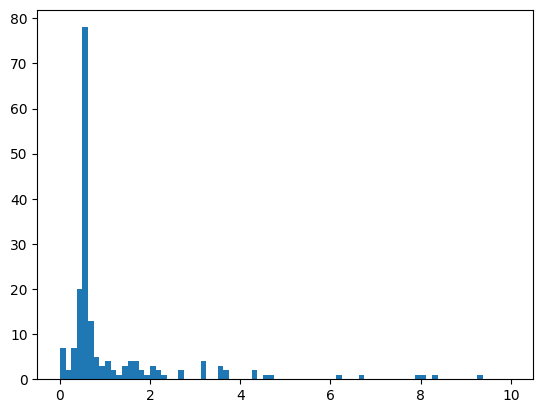

In [17]:
plt.hist(dumb,range=(0,10),bins=80)

(array([42.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.30872758, 0.60233947, 0.89595135, 1.18956324, 1.48317512,
        1.77678701, 2.0703989 , 2.36401078, 2.65762267, 2.95123455,
        3.24484644]),
 <BarContainer object of 10 artists>)

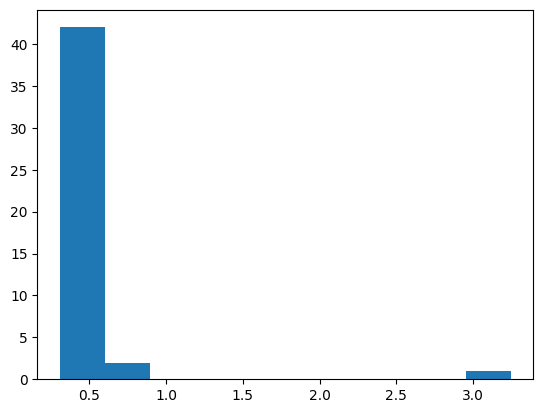

In [18]:
plt.hist(b4PC/b4DS)

# Here I bring in EPR NMR before and after sweeps

In [19]:
EPRdates

array([9221110., 9290411., 9290449.])

In [20]:
'20230'+str(int(EPRdates[0]))

'202309221110'

In [21]:
myFits=np.transpose(hunterFitsK2)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))


dateList=np.empty(0)
RatioB=np.empty(0)
RatioA=np.empty(0)

for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])
for i in range(0,len(EPRdates)):
    b,a=FindNMRsB4andAft('20230'+str(int(EPRdates[i])),dateList)
    print('20230'+str(int(EPRdates[i])),i)
    print(HunterKin2FitsOrdered[0][b],' ',HunterKin2FitsOrdered[0][a])
    RatioB=np.append(RatioB,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioA=np.append(RatioA,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(str(a)+" "+str(b))
    
 

 
#EPRdates=EPRdates[np.where(RatioB<1)]
#EPRpc=EPRpc[np.where(RatioB<1)]
#EPRds=EPRds[np.where(RatioB<1)]
#RatioB=RatioB[np.where(RatioB<1)]

202309221110 0
20230922110727.0   20230922111153.0
202309290411 1
20230929041108.0   20230929041256.0
202309290449 2
20230929044904.0   20230929045106.0


In [22]:
RatioB

array([0.59274611, 0.58304672, 0.59265529])

In [23]:
RatioA

array([0.59381784, 0.55818624, 0.56682161])

# EPR Density Corrections

In [24]:
RatioB

array([0.59274611, 0.58304672, 0.59265529])

This better be 1.0 -->  1.0
3.5718188748589568   3.2631580769596003


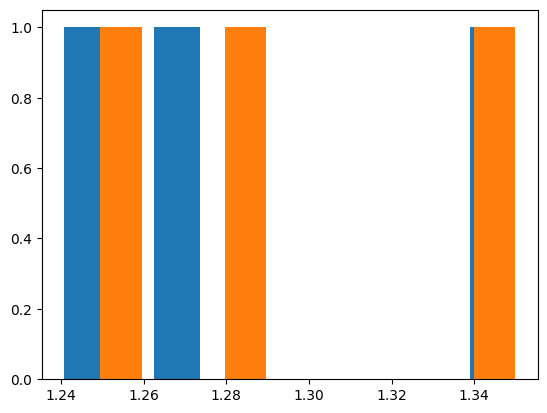

In [25]:
C2=331.18 #V_PC
C3=43.34 #V_TT
C4=208.93 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.953 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.58304672 #ref_ratio
#F5=.37815029

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(RatioB)):
    N=np.append(N,(F5/RatioB[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(RatioB)):
    R=np.append(R,1/((F5/RatioB[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(RatioB)):
    S=np.append(S,(F5/RatioB[i])/((F5/RatioB[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(RatioB)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(RatioB)):
    U=np.append(U,S[i]*I3)

adjDS=EPRds*S
adjDS=adjDS[np.where(adjDS!=0)]
adjPC=EPRpc*R
adjPC=adjPC[np.where(adjPC!=0)]
dsBaseLine=EPRds[np.where(EPRds!=0)]
FinalEPRds=np.mean(adjDS)
FinalEPRdsE=np.std(adjDS)


dsNewHist=plt.hist(adjDS)
dsHist=plt.hist(dsBaseLine)
print(100*np.std(adjDS)/np.mean(adjDS),' ',100*np.std(dsBaseLine)/np.mean(adjDS))

In [26]:
#addin november 12

## add on to use alpha and beta to correct NMRs


C2=331.18 #V_PC
C3=43.34 #V_TT
C4=208.93 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.953 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.58304672 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(sweepRatios)):
    N=np.append(N,(F5/sweepRatios[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(sweepRatios)):
    R=np.append(R,1/((F5/sweepRatios[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(sweepRatios)):
    S=np.append(S,(F5/sweepRatios[i])/((F5/sweepRatios[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(sweepRatios)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(sweepRatios)):
    U=np.append(U,S[i]*I3)
    
newEPRs=FinalEPRds/S


This better be 1.0 -->  1.0


In [27]:
len(adjDS)

3

In [28]:
adjDS=adjDS[np.where(adjDS<2)]

In [29]:
len(adjDS)

3

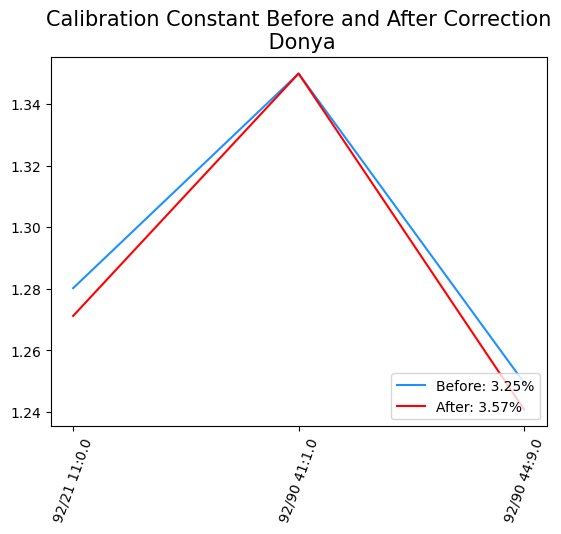

In [30]:
EPRdatetime=np.empty(0)
dateString=np.empty(0)

oldPerc=str(np.round(np.std(EPRds)/np.mean(EPRds)*100,2))
newPerc=str(np.round(np.std(adjDS)/np.mean(adjDS)*100,2))

for i in range(0,len(EPRdates)):
    EPRdatetime=np.append(EPRdatetime,datetime.strptime('20230'+str(int(EPRdates[i])),'%Y%m%d%H%M'))
    
    dateString=np.append(dateString,str(EPRdates[i])[:2]+'/'+str(EPRdates[i])[2:4]+' '+str(EPRdates[i])[4:6]+':'+str(EPRdates[i])[6:])

plt.plot(dateString,EPRds,label='Before: '+oldPerc+'%',color='dodgerblue')
plt.plot(dateString,adjDS,label='After: '+newPerc+'%',color='red')
plt.legend(loc='lower right')
x=plt.xticks(rotation=70)



#np.std(adjDS)/np.mean(adjDS)*100
plt.title("Calibration Constant Before and After Correction"+'\n Donya',fontsize=15)
plt.savefig('CalCorrectionDonya.png')

In [31]:
FinalEPRds=np.mean(adjDS)
FinalEPRds=np.mean(EPRds)

In [32]:
FinalEPRds

1.2932

In [33]:
np.mean(EPRds)

1.2932

# Take the Density Corrected EPR Calibration and apply it to all NMRs

In [34]:
len(H2)

241

In [35]:
CorrectedRatio=F5

newEPRds=np.empty(0)
CorrectedNMRs=np.empty(0)
for i,j in enumerate(H2):
#    CorrectedNMRs=np.append(CorrectedNMRs,j*FinalEPRds*sweepRatios[i]/CorrectedRatio)
    CorrectedNMRs=np.append(CorrectedNMRs,j*newEPRs[i])

    newEPRds=np.append(newEPRds,FinalEPRds*sweepRatios[i]/CorrectedRatio)

In [36]:
newEPRds

array([9.39214112e-01, 9.80425903e-01, 9.26757226e-01, 9.40048326e-01,
       9.43634330e-01, 9.42006542e-01, 6.84759032e-01, 9.44797046e-01,
       9.46742448e-01, 1.04400587e+00, 9.65969642e-01, 8.54921577e-01,
       8.83053078e-01, 9.11756778e-01, 9.40203567e-01, 9.45343933e-01,
       9.35350055e-01, 9.15924024e-01, 9.44494456e-01, 9.79688364e-01,
       9.38314535e-01, 9.45533496e-01, 9.28755459e-01, 1.94117281e+00,
       9.21280261e-01, 9.37597827e-01, 9.35551421e-01, 9.43766845e-01,
       9.36502079e-01, 9.63181657e-01, 9.49769127e-01, 8.58680225e-01,
       9.54584410e-01, 9.37529940e-01, 9.53188782e-01, 9.59970597e-01,
       9.49412550e-01, 9.47655513e-01, 9.41791416e-01, 9.49685588e-01,
       9.52570114e-01, 1.49881861e+00, 9.41453283e-01, 9.49892517e-01,
       7.19708262e+00, 6.97792258e+00, 3.62784894e+01, 7.06957813e+00,
       1.37424994e+01, 1.84949645e+01, 7.12593185e+00, 3.66318523e+00,
       4.56495176e+00, 8.15949090e+00, 4.91118114e+00, 8.18578049e+00,
      

### Create error arrays and variables for FinalEPRds, SweepRatios

In [37]:
CorrectedNMRs=H2*np.mean(adjDS)

#Hsorted_dates2=Hsorted_dates2[np.where(CorrectedNMRs<50)]
#sweepRatios=sweepRatios[np.where(CorrectedNMRs<50)]
#CorrectedNMRs=CorrectedNMRs[np.where(CorrectedNMRs<50)]


In [38]:
np.save("uncorrected.npy",H2)
np.savetxt("FinalEPRdsE.txt",[[FinalEPRdsE]])
np.savetxt("FinalEPRds.txt",[FinalEPRds])
np.savetxt("ReferenceRatio.txt",[[CorrectedRatio]])
np.save("newEPRds.npy",newEPRds)
np.save("sweepRatios.npy",sweepRatios)

(array([19613., 19617., 19621., 19625., 19629., 19631., 19635., 19639.]),
 [Text(19613.0, 0, '2023-09-13'),
  Text(19617.0, 0, '2023-09-17'),
  Text(19621.0, 0, '2023-09-21'),
  Text(19625.0, 0, '2023-09-25'),
  Text(19629.0, 0, '2023-09-29'),
  Text(19631.0, 0, '2023-10-01'),
  Text(19635.0, 0, '2023-10-05'),
  Text(19639.0, 0, '2023-10-09')])

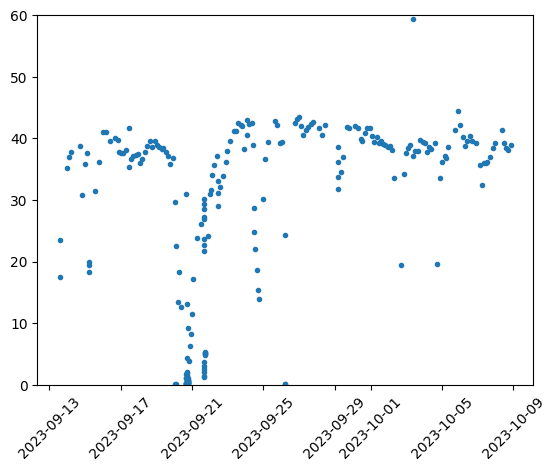

In [39]:
plt.plot(Hsorted_dates2,CorrectedNMRs,'.')
plt.ylim((0,60))
plt.xticks(rotation=45)

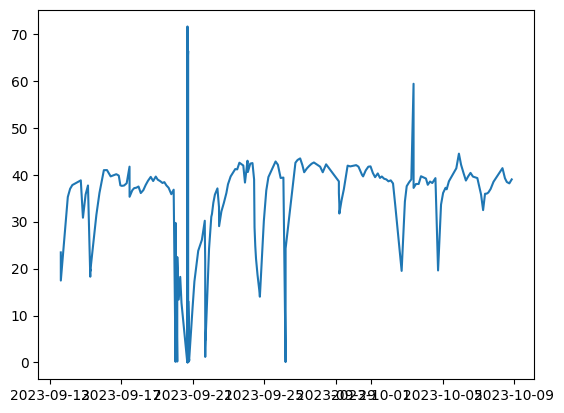

In [40]:
plt.plot(Hsorted_dates2,CorrectedNMRs)

In [41]:
np.mean(adjDS)

1.2872888282657584

In [42]:
np.save(sys.path[0]+'/../DSortedDatesCorrected.npy',Hsorted_dates2)
np.save(sys.path[0]+'/../DCorrectedDSNMR.npy',CorrectedNMRs)

In [43]:
len

<function len(obj, /)>